## (Core) Project 3 - Part 1
For this assignment, you will be starting a new portfolio project that you will continue to build on over the remaining weeks of this course.

* For Part 1, you will be downloading and preparing a crime dataset for time series analysis.
* You will then answer the provided stakeholder questions and support your answers with visualizations.

### Chicago Crime Data
* #### We have prepared a zip file with the Chicago crime data which you can download here.
* Original Source: Chicago Data Portal: Crimes 2001 to Present
    * Data Description:
        * All Crimes that were reported in the city of Chicago and their details View Preview
    * Includes:
        * type of crime, exact date/time, lat/long, District/ward, was there an arrest, etc.
    * Note: The original .csv is very large and needs to be processed into smaller files to fit inside a GitHub repository.
    * We have provided a .zip file (linked above) with the data in a repo-friendly format. For those who are curious the code for converting the downloaded file to the .zip file of individual years, please see this helper notebook.
* #### Supplemental Data: Holiday Data
    * Check the lesson on "Feature Engineering: Holidays" to see how to use the Python 'holidays' package to add holidays to your dataset.
* #### Notes/Considerations:
    * You may need to keep 2 forms of the data:
        * The original individual crime data with a datetime index. (Each row is 1 crime)
        * A resampled/converted crime counts version (Each row is 1 day)

### Task
Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

#### Stakeholder Questions to Answer (Pick at least 3 topics):

Select 3 or more of the following topics to analyze:

* #### Topic 1) Comparing Police Districts
    * Which district had the most crimes in 2022?
    * Which had the least?

* #### Topic 2) Crimes Across the Years:
    * Is the total number of crimes increasing or decreasing across the years?
    * Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

* #### Topic 3) Comparing AM vs. PM Rush Hour:
    * Are crimes more common during AM rush hour or PM rush hour?
        * You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
        * You can consider any crime that occurred between 4 - 7 PM as PM rush hour.
    * Answer the question: What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
    * Answer the question: Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

* #### Topic 4) Comparing Months:
    * Answer the question: What months have the most crime? What months have the least?
    * Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

* #### Topic 5) Comparing Holidays:
    * Answer the question: What are the top 3 holidays with the largest number of crimes?
    * Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

* #### Topic 6) What cycles (seasonality) can you find in this data?
    * ##### Make sure to select the data of interest and that it is resampled to the frequency you want. 
        * (See the "Suggested data to check for seasons" list at the bottom of this topic for suggestions) .
    * #### Use statsmodels.tsa.seasonal.seasonal_decompose() to decompose the time series.
        * Note: seasonal_decompose cannot read data resampled as minutes or smaller, and if you try seconds, you will crash your computer. Keep your resampling at hours or more.

    * #### Show and describe each cycle you can find.
        * (Hint: If your seasonal results are too dense to read, try zooming in to look at just one year or one month and try different levels of resampling).
        * Answer the question: How long is a cycle?
        * Answer the question: What is the magnitude of the cycle? (Compare min and max).

    * #### Suggested data to check for seasons:
        * Total Crime (Daily)
        * Total Crime (Weekly)
        * Total Crime (Monthly)
        * Select a Primary Type of interest to you (Daily)
        * Select a Primary Type of interest to you (Weekly)
        * Select a Primary Type of interest to you (Monthly)

### Final Submission
Submit the link to your GitHub Repository (make sure it is public!)

In [93]:
# install one time
# !pip install holidays

  Obtaining dependency information for holidays from https://files.pythonhosted.org/packages/62/65/0c1b00ba459c6b4cfacdfb060e21160320b60f0fb3ebc97bca982f1db861/holidays-0.45-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/932.4 kB ? eta -:--:--
   --- ------------------------------------ 71.7/932.4 kB 2.0 MB/s eta 0:00:01
   ---------------- ----------------------- 389.1/932.4 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 932.4/932.4 kB 8.5 MB/s eta 0:00:00


In [127]:
# imports
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import holidays
import datetime as dt
from holidays import country_holidays

In [3]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

### Load the Data

In [4]:
folder = r"C:\Users\bandi\Data\Chicago\\"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [5]:
chicago_df = df.copy()
chicago_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


### Convert the date column to datetime dtype

In [8]:
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
chicago_df['Date']

0        2001-01-01 01:00:00
1        2001-01-01 13:00:00
2        2001-01-01 13:00:00
3        2001-01-01 01:00:00
4        2001-01-01 01:00:00
                 ...        
238853   2022-12-31 12:50:00
238854   2022-12-31 12:50:00
238855   2022-12-31 00:52:00
238856   2022-12-31 12:52:00
238857   2022-12-31 12:59:00
Name: Date, Length: 7713109, dtype: datetime64[ns]

In [9]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [11]:
chicago_df = chicago_df.set_index('Date')
chicago_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [12]:
chicago_df.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2022-12-31 12:41:00', '2022-12-31 00:42:00',
               '2022-12-31 00:44:00', '2022-12-31 00:45:00',
               '2022-12-31 12:45:00', '2022-12-31 12:50:00',
               '2022-12-31 12:50:00', '2022-12-31 00:52:00',
               '2022-12-31 12:52:00', '2022-12-31 12:59:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [16]:
## Inspect the value_counts for the different types of crimes
crime_counts = chicago_df['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts

,Total # of Crimes
Primary Type,
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958


In [25]:
# create a date (no time) as column
chicago_df['Date'] = chicago_df.index.date
chicago_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001-01-01
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001-01-01


In [26]:
# create a year column
chicago_df['Year'] = chicago_df.index.year
chicago_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date,Year
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01,2001
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001-01-01,2001
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001-01-01,2001


In [28]:
# extracting the month
chicago_df['Month'] = chicago_df.index.month
chicago_df['MonthName'] = chicago_df.index.month_name()
chicago_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date,Year,Month,MonthName
Date,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01,2001,1,January
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001-01-01,2001,1,January
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001-01-01,2001,1,January


In [29]:
# saving lookup for number vs name
unique_months = chicago_df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [30]:
## adding day of week as both number & name
chicago_df['DayOfWeek'] = chicago_df.index.day_name()
chicago_df['DayNum'] = chicago_df.index.day_of_week
chicago_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date,Year,Month,MonthName,DayOfWeek,DayNum
Date,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01,2001,1,January,Monday,0
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001-01-01,2001,1,January,Monday,0
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001-01-01,2001,1,January,Monday,0


In [31]:
# saving lookup for number vs named days
unique_days = chicago_df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup =dict(zip(unique_days['DayNum'],unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [32]:
# adding hour of the day (12am=0) 
chicago_df['HourOfDay'] = chicago_df.index.hour 
chicago_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date,Year,Month,MonthName,DayOfWeek,DayNum,HourOfDay
Date,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01,2001,1,January,Monday,0,1
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001-01-01,2001,1,January,Monday,0,13
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001-01-01,2001,1,January,Monday,0,13


 ### Topic 1) Comparing Police Districts
* Which district had the most crimes in 2022?
* Which had the least?

In [151]:
# Crime counts by district for 2022
district_crimes_2022 = chicago_df.loc['2022'].groupby('District').size().sort_values(ascending=False)

In [152]:
# District with the most crimes
most_crimes_district = district_crimes_2022.idxmax()
most_crimes_district

8.0

In [153]:
# District with the least crimes
least_crimes_district = district_crimes_2022.idxmin()
least_crimes_district

31.0

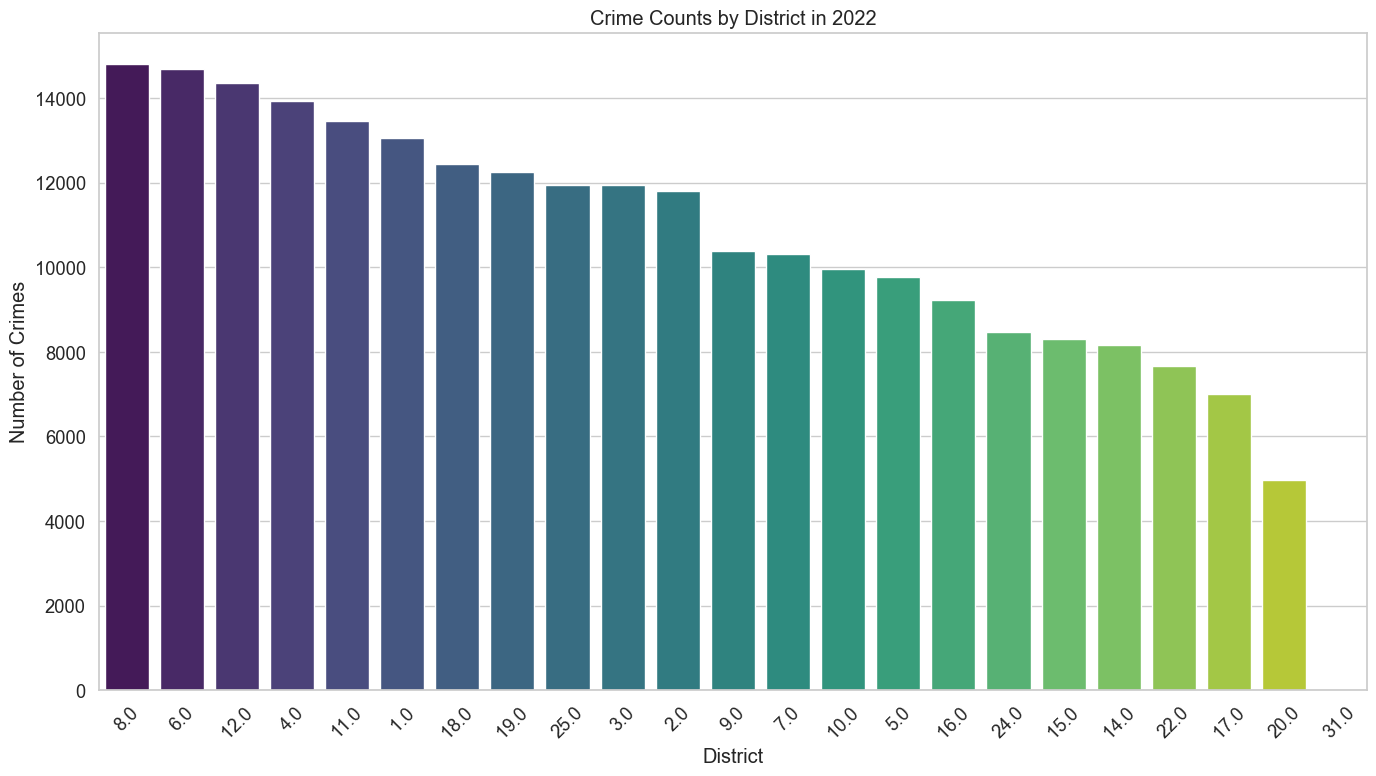

In [154]:
# Filtering the DataFrame for the year 2022
df_2022 = chicago_df.loc['2022']

# Visualization
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='District', data=df_2022, palette='viridis', order = df_2022['District'].value_counts().index)
ax.set_title('Crime Counts by District in 2022')
ax.set_xlabel('District')
ax.set_ylabel('Number of Crimes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

### Topic 3) Comparing AM vs. PM Rush Hour:
* Are crimes more common during AM rush hour or PM rush hour?
    * You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
    * You can consider any crime that occurred between 4 - 7 PM as PM rush hour.
* Answer the question: What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
* Answer the question: Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [68]:
# Filter crimes for AM and PM rush hours
am_rush = chicago_df.between_time('07:00', '10:00')
pm_rush = chicago_df.between_time('16:00', '19:00')

# Count and compare
am_crimes = am_rush.shape[0]
pm_crimes = pm_rush.shape[0]

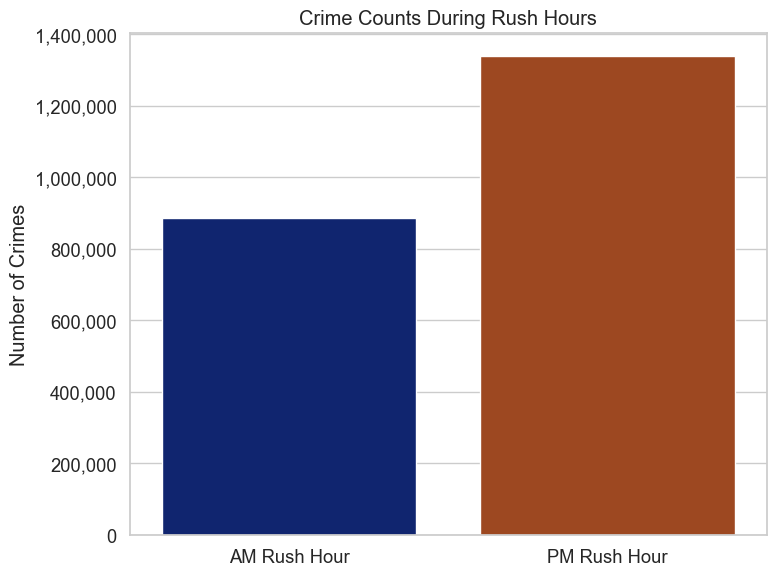

In [148]:
rush_hour_counts = [am_crimes, pm_crimes]
rush_hour_labels = ['AM Rush Hour', 'PM Rush Hour']

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=rush_hour_labels, y=rush_hour_counts, palette='dark')
plt.title('Crime Counts During Rush Hours')
plt.ylabel('Number of Crimes')

# Format y-axis labels to display large numbers with commas
formatter = mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [69]:
# Top 5 crimes during AM rush hour
top_5_am = am_rush['Primary Type'].value_counts().head(5)
top_5_am

Primary Type
THEFT              220879
BATTERY            118612
CRIMINAL DAMAGE     93153
BURGLARY            84944
OTHER OFFENSE       73991
Name: count, dtype: int64

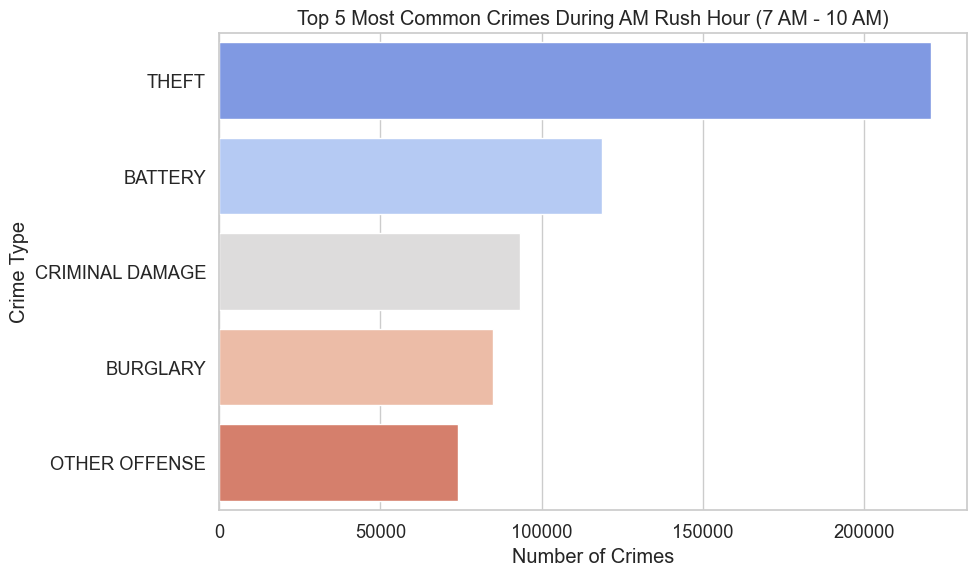

In [149]:
# Setting up the plotting environment
sns.set_style("whitegrid")

# Visualization of Top 5 crimes during AM rush hour
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_am.values, y=top_5_am.index, palette='coolwarm')
plt.title('Top 5 Most Common Crimes During AM Rush Hour (7 AM - 10 AM)')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

In [70]:
# Top 5 crimes during PM rush hour
top_5_pm = pm_rush['Primary Type'].value_counts().head(5)
top_5_pm

Primary Type
THEFT              333344
BATTERY            228265
CRIMINAL DAMAGE    155030
NARCOTICS          107795
ASSAULT             95933
Name: count, dtype: int64

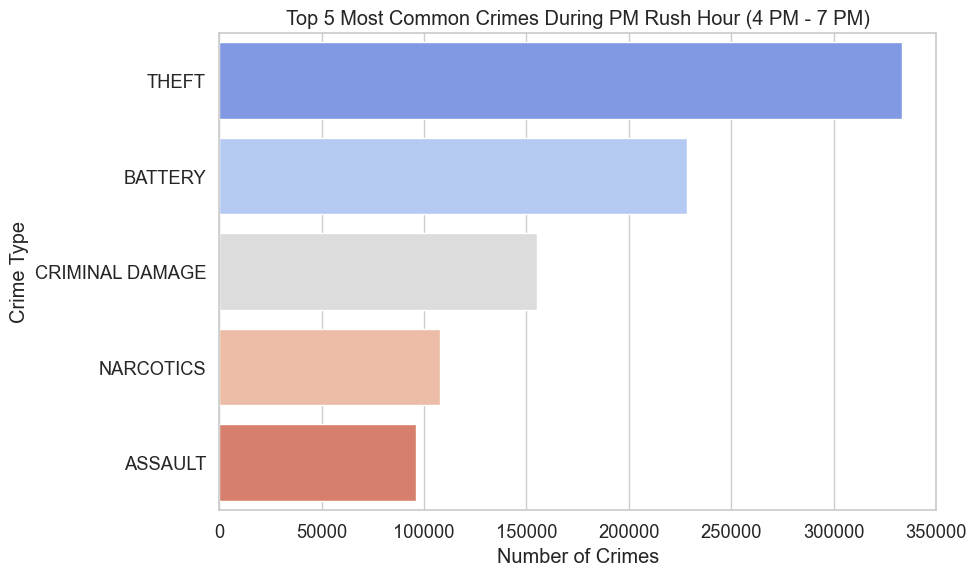

In [150]:
# Visualization of Top 5 crimes during PM rush hour
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_pm.values, y=top_5_pm.index, palette='coolwarm')
plt.title('Top 5 Most Common Crimes During PM Rush Hour (4 PM - 7 PM)')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

In [71]:
# Motor Vehicle Thefts during AM rush hours
mv_am = am_rush[am_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
mv_am

48764

In [72]:
# Motor Vehicle Thefts during PM rush hours
mv_pm = pm_rush[pm_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
mv_pm

66116

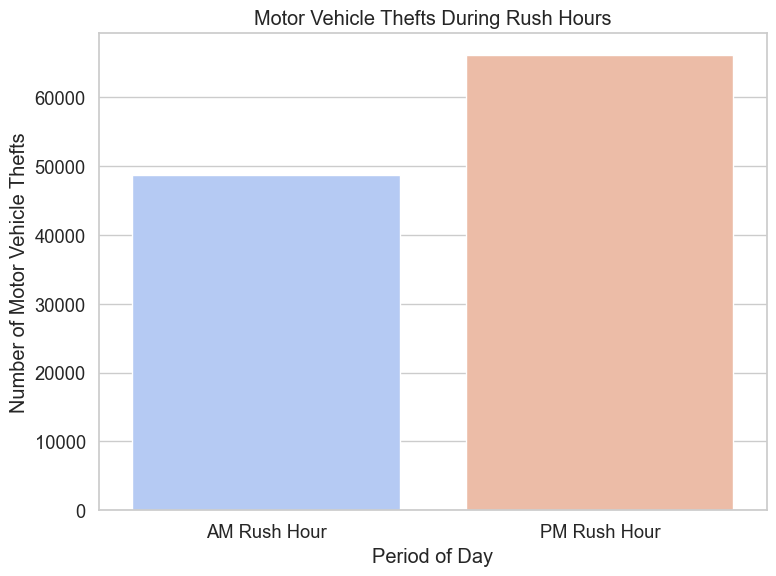

In [137]:
# Data preparation
motor_vehicle_thefts_counts = [mv_am, mv_pm]
rush_hour_periods = ['AM Rush Hour', 'PM Rush Hour']

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=rush_hour_periods, y=motor_vehicle_thefts_counts, palette='coolwarm')
plt.title('Motor Vehicle Thefts During Rush Hours')
plt.xlabel('Period of Day')
plt.ylabel('Number of Motor Vehicle Thefts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Topic 5) Comparing Holidays:
* Answer the question: What are the top 3 holidays with the largest number of crimes?
* Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [95]:
## making a date range that covers full dataset
all_days = pd.date_range(chicago_df["Date"].min(), chicago_df["Date"].max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [100]:
# To get the holidays for Chicago, Illinois (IL)
iL_holidays = country_holidays('US', subdiv='IL')
iL_holidays

holidays.country_holidays('US', subdiv='IL')

In [101]:
## Saving holiday types as column
chicago_df['IL Holiday'] = [iL_holidays.get(day) for day in chicago_df['Date']]
chicago_df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date,Year,Month,MonthName,DayOfWeek,DayNum,HourOfDay,IL Holiday
Date,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01,2001,1,January,Monday,0,1,New Year's Day
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001-01-01,2001,1,January,Monday,0,13,New Year's Day
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001-01-01,2001,1,January,Monday,0,13,New Year's Day
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,2001-01-01,2001,1,January,Monday,0,1,New Year's Day
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,2001-01-01,2001,1,January,Monday,0,1,New Year's Day


In [103]:
# Filter for crimes on holidays
holiday_crimes = updated_chicago_df.dropna(subset=['IL Holiday'])

# Count crimes for each holiday
crimes_by_holiday = holiday_crimes['IL Holiday'].value_counts()
crimes_by_holiday

IL Holiday
New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Casimir Pulaski Day                                19128
Lincoln's Birthday                                 18165
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Election Day                                        6342
Independence Day (observed)                         5884
Veterans Day (observed)                             5842
Lincoln's Birthday (observed)                       5156
Christmas Day (observed)                            4929
New Year's Day (obse

In [104]:
top_3_holidays = crimes_by_holiday.head(3)
print("Top 3 Holidays with Most Crimes:")
print(top_3_holidays)

Top 3 Holidays with Most Crimes:
IL Holiday
New Year's Day      32725
Independence Day    22672
Labor Day           22164
Name: count, dtype: int64


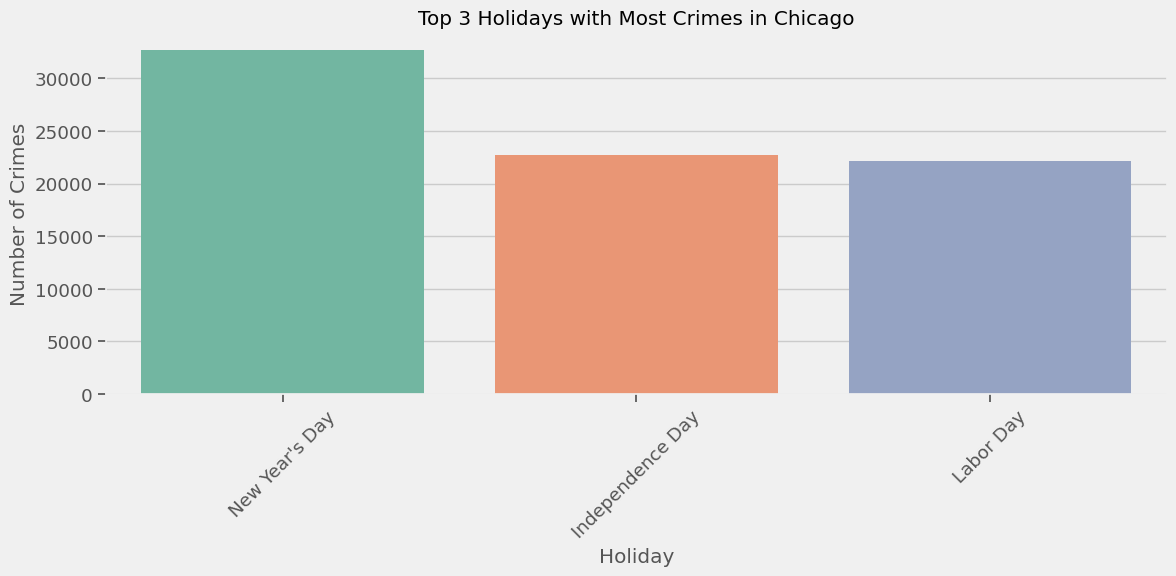

In [117]:
# Plot the Top 3 Holidays with Most Crimes
top_3_holidays_df = top_3_holidays.reset_index()
top_3_holidays_df.columns = ['Holiday', 'Number of Crimes']

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Holiday', y='Number of Crimes', data=top_3_holidays_df, palette='Set2')
ax.set_title('Top 3 Holidays with Most Crimes in Chicago')
ax.set_xlabel('Holiday')
ax.set_ylabel('Number of Crimes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [105]:
# Determine Top 5 Most Common Crimes on the Top 3 Holidays
for holiday in top_3_holidays.index:
    print(f"\nMost common crimes on {holiday}:")
    common_crimes = holiday_crimes[holiday_crimes['IL Holiday'] == holiday]['Primary Type'].value_counts().head(5)
    print(common_crimes)


Most common crimes on New Year's Day:
Primary Type
THEFT                         6845
BATTERY                       6043
CRIMINAL DAMAGE               3236
DECEPTIVE PRACTICE            2934
OFFENSE INVOLVING CHILDREN    2380
Name: count, dtype: int64

Most common crimes on Independence Day:
Primary Type
BATTERY            5805
THEFT              4074
CRIMINAL DAMAGE    3309
ASSAULT            1547
NARCOTICS          1522
Name: count, dtype: int64

Most common crimes on Labor Day:
Primary Type
BATTERY            4607
THEFT              4520
CRIMINAL DAMAGE    2475
NARCOTICS          2078
ASSAULT            1525
Name: count, dtype: int64


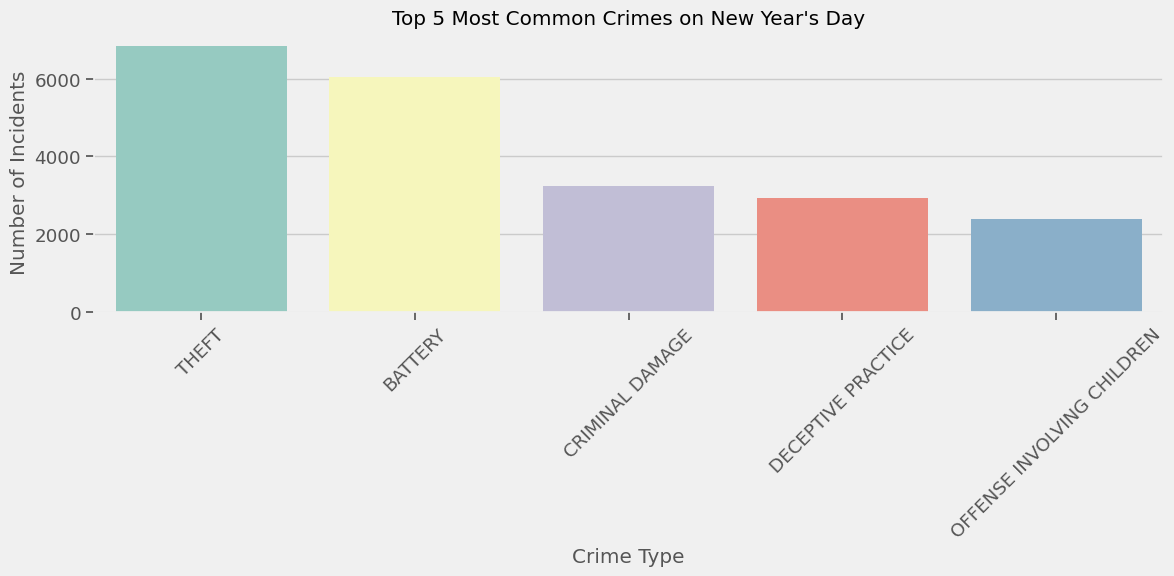

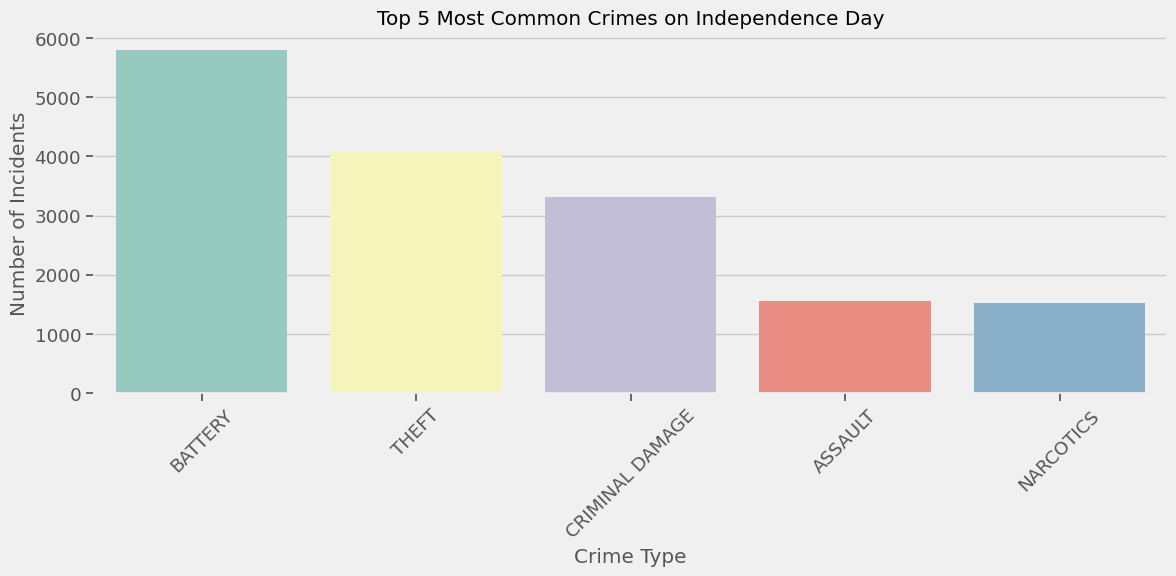

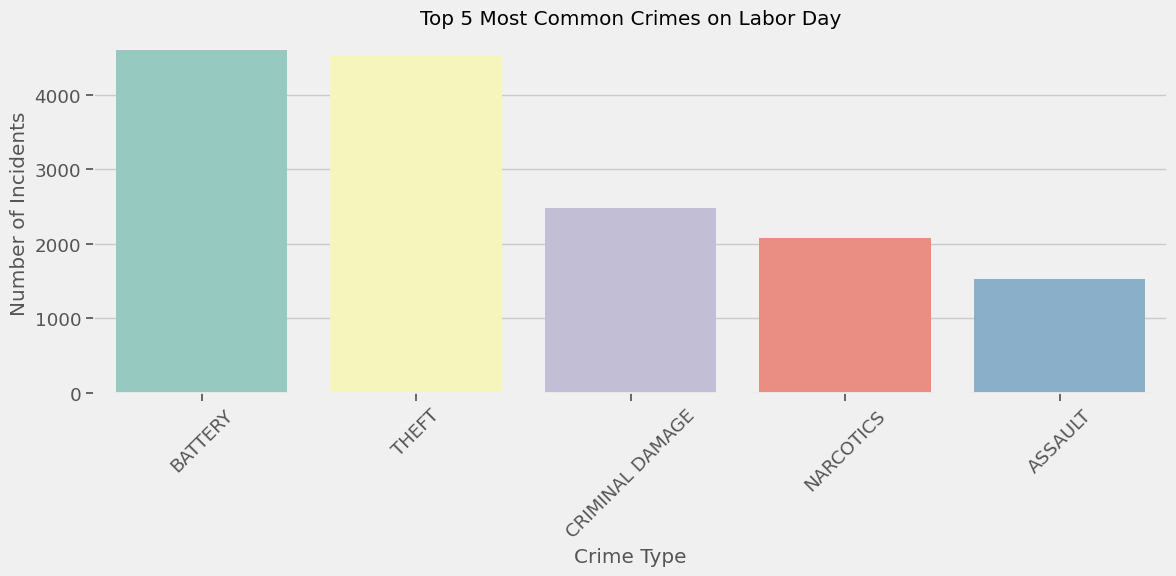

In [118]:
# Plot the Top 5 Most Common Crimes for Each Top Holiday
for holiday in top_3_holidays.index:
    common_crimes = holiday_crimes[holiday_crimes['IL Holiday'] == holiday]['Primary Type'].value_counts().head(5)
    common_crimes_df = common_crimes.reset_index()
    common_crimes_df.columns = ['Crime Type', 'Number of Incidents']
    
    # Visualization
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Crime Type', y='Number of Incidents', data=common_crimes_df, palette='Set3')
    ax.set_title(f'Top 5 Most Common Crimes on {holiday}')
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Number of Incidents')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()